<a href="https://colab.research.google.com/github/LiliNemes/Training-Project-Laboratory/blob/main/Chow_Liu_structure_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%%capture
!pip install pomegranate==0.14.9
!apt-get install -y graphviz-dev
!pip install pygraphviz

In [16]:
%matplotlib inline

import matplotlib as mpl
# Just so the generated figures won't look too ugly
mpl.rcParams['figure.figsize'] = [3, 2]
mpl.rcParams['figure.dpi'] = 200

from matplotlib import pyplot as plt

import pomegranate as pg; print('pg: ' + pg.__version__)

pg: 0.14.9


In [17]:
import numpy as np
import pandas as pd

# A DREAM-es adattal

In [18]:
expr_df_dream_10_2 = pd.read_csv('/content/insilico_size10_2_timeseries.csv')
expr_df_dream_10_2 =expr_df_dream_10_2.drop('Time', axis =1)
expr_df_dream_10_2

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
0,0.662862,0.147892,0.612020,0.714711,0.167180,0.648597,0.041663,0.727959,0.606671,0.597840
1,0.676153,0.266299,0.586658,0.621130,0.176810,0.211477,0.095828,0.727870,0.616072,0.353509
2,0.649909,0.227110,0.555205,0.728632,0.284069,0.147542,0.159424,0.616108,0.610239,0.246683
3,0.736561,0.311908,0.612033,0.636412,0.232231,0.116646,0.108219,0.699758,0.655452,0.229679
4,0.669694,0.359380,0.552215,0.601949,0.169042,0.084337,0.039150,0.628438,0.606285,0.242102
...,...,...,...,...,...,...,...,...,...,...
100,0.623120,0.206816,0.644236,0.627551,0.190018,0.658545,0.033946,0.726625,0.610806,0.713289
101,0.697262,0.157090,0.636567,0.744639,0.102024,0.670721,0.078784,0.678612,0.564072,0.729505
102,0.716779,0.096157,0.737933,0.634934,0.073147,0.577803,0.105969,0.661777,0.696780,0.662698
103,0.646444,0.054004,0.768394,0.652855,0.124739,0.879677,0.080909,0.631575,0.662133,0.689125


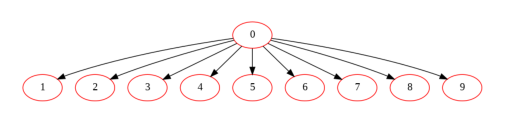

In [19]:
expr_np_dream_10_2 = expr_df_dream_10_2.values
learned_model_dream = pg.BayesianNetwork.from_samples(expr_np_dream_10_2, algorithm='chow-liu')
learned_model_dream.plot()

# Az eredeti adattal

In [21]:
expr_df= pd.read_excel('/content/GSE196022_Processed_RNA-seq_data_Exp2_TYL.xlsx')
expr_df = expr_df.set_index(expr_df.columns[0])
expr_df.head()
expr_df

,Gene Symbol,WA1,WA2,WA3,WB1,WB2,WB3,WG1,WG2,WG3,WH1,WH2,WH3
Gene ID,,,,,,,,,,,,,
N_ambiguous,NaN,586469,613998,592304,579436,582664,587327,619678,640518,667943,639081,636442,653896
N_multimapping,NaN,2363012,2375052,2467767,1605724,1607926,1633015,1201901,1214579,1246535,1500219,1524118,1594142
N_noFeature,NaN,311411,341651,319481,435014,428248,431133,411526,434017,439675,555644,517594,538930
WBGene00000001,aap-1,2901,2806,2970,1712,1743,1560,3756,3660,3973,2181,2138,2187
WBGene00000002,aat-1,315,339,385,1086,913,1017,255,268,293,594,601,631
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00255728,R02C2.8,3,4,7,30,48,26,16,11,27,39,51,49
WBGene00255736,C03H5.10,12,12,12,12,9,6,22,15,23,6,10,10
WBGene00268189,Y50D4B.9,2,0,2,8,10,4,0,4,2,14,10,11


In [22]:
expr_df = expr_df[3::]
expr_df_shorter = expr_df[0:20]
expr_df_shorter = expr_df_shorter.drop(axis=1, columns=['Gene Symbol'])
expr_df_shorter

,WA1,WA2,WA3,WB1,WB2,WB3,WG1,WG2,WG3,WH1,WH2,WH3
Gene ID,,,,,,,,,,,,
WBGene00000001,2901,2806,2970,1712,1743,1560,3756,3660,3973,2181,2138,2187
WBGene00000002,315,339,385,1086,913,1017,255,268,293,594,601,631
WBGene00000003,312,317,263,581,497,524,386,407,393,776,703,705
WBGene00000004,1029,941,1023,1077,1041,1125,1071,1107,1084,1176,1123,1282
WBGene00000005,498,451,410,267,256,278,120,111,114,125,71,96
WBGene00000006,181,107,188,631,554,542,372,390,426,829,741,851
WBGene00000007,360,291,311,571,618,698,267,276,280,294,308,315
WBGene00000008,44,54,44,76,88,102,18,18,18,28,40,56
WBGene00000009,12,9,16,53,42,52,4,2,2,0,7,1


## Normalized data

In [23]:
expr_np = np.array(expr_df_shorter)
expr_np = np.transpose(expr_np)
norm = np.linalg.norm(expr_np)
normalized = expr_np/norm
normalized

array([[6.61614885e-02, 7.18402926e-03, 7.11560993e-03, 2.34678289e-02,
        1.13576082e-02, 4.12796602e-03, 8.21031915e-03, 1.00348345e-03,
        2.73677305e-04, 3.85428871e-02, 1.20874143e-03, 6.84193263e-04,
        4.56128842e-05, 4.65251419e-03, 2.50870863e-03, 1.70364122e-02,
        3.37535343e-03, 1.23610916e-02, 4.56128842e-04, 3.99796930e-02],
       [6.39948765e-02, 7.73138387e-03, 7.22964214e-03, 2.14608620e-02,
        1.02857054e-02, 2.44028930e-03, 6.63667465e-03, 1.23154787e-03,
        2.05257979e-04, 3.51447273e-02, 1.27716076e-03, 1.00348345e-03,
        9.12257683e-05, 3.76306294e-03, 2.18941844e-03, 1.56452193e-02,
        2.82799882e-03, 9.39625414e-03, 1.82451537e-04, 3.80183390e-02],
       [6.77351330e-02, 8.78048020e-03, 5.99809427e-03, 2.33309903e-02,
        9.35064125e-03, 4.28761111e-03, 7.09280349e-03, 1.00348345e-03,
        3.64903073e-04, 4.03445960e-02, 9.12257683e-04, 9.35064125e-04,
        1.36838653e-04, 3.12448257e-03, 1.84732181e-03, 1.6283

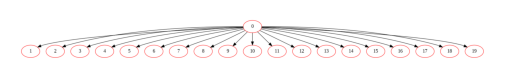

In [24]:
learned_model = pg.BayesianNetwork.from_samples(normalized, algorithm='chow-liu')
learned_model.plot()

##Real data

In [25]:
expr_np = np.array(expr_df_shorter)
expr_np = np.transpose(expr_np)

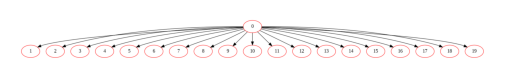

In [28]:
learned_model = pg.BayesianNetwork.from_samples(expr_np, algorithm='chow-liu')
learned_model.plot()